# Fun with Images

The purpose of this notebook is to experiment with different image libraries and artistic techniques.  

# Initial Set-up

In [86]:
# Import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from matplotlib import rcParams
from PIL import Image

%matplotlib inline
rcParams.update({'figure.autolayout': True})
rcParams['axes.titlepad'] = 20

In [147]:
# Relevant folders
IMAGES = 'images/'
janFolder = IMAGES + 'janPhotos/'
pikachuFolder = IMAGES + 'pikachuPhotos/'

/Applications/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


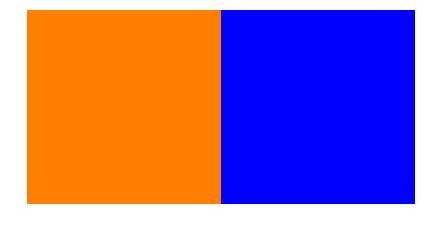

In [18]:
# Simple demo on how to make images rgba style
array = np.zeros([100,200, 4], dtype=np.uint8)
array[:,:100] = [255,128,0, 255] # Orange left side
array[:,100:] = [0, 0, 255,255] # Blue right side

img = Image.fromarray(array)
img.format = 'PNG'
img.save('testrgba.png')
plt.axis('off')
imshow(array)

/Applications/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


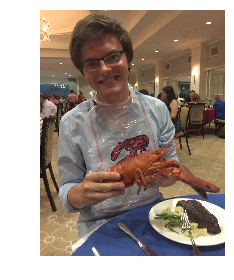

In [19]:
# Simple demo on how to load images rgba style
img = Image.open(IMAGES + 'jan.png')
array = np.array(img)
plt.axis('off')
imshow(array)

In [56]:
def showArray(array):
    plt.axis('off')
    imshow(array)

def saveArray(array, fout):
    img = Image.fromarray(array)
    img.format = 'PNG'
    img.save(fout)

# Experiments with Resolution of Photo

## First, we will simply skip pixels

In [54]:
def skipRes(filename, n):
    """
    filename: name of image to load in - must be .png
    n: number of pixels to skip every row and column
    """
    img = Image.open(filename)
    origArray = np.array(img)
    y, x, rgba = origArray.shape
    
    # Find shape of new array
    newArray = np.zeros([y // n + 1, x // n + 1, rgba], dtype=np.uint8)
    
    for row in range(y):
        for col in range(x):
            if row % n == 0 and col % n == 0:
                newArray[row // n, col // n] = origArray[row, col]
    return newArray

/Applications/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


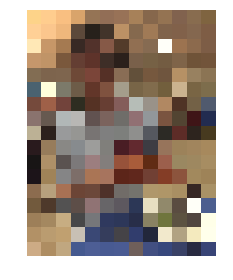

In [59]:
newImage = skipRes(janFolder + 'jan.png', 200)
saveArray(newImage, janFolder + 'jan_lowres_200.png')
showArray(newImage)

/Applications/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


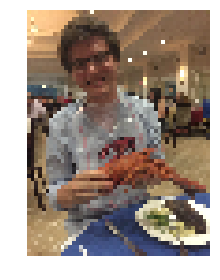

In [60]:
newImage = skipRes(janFolder + 'jan.png', 50)
saveArray(newImage, janFolder + 'jan_lowres_50.png')
showArray(newImage)

/Applications/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


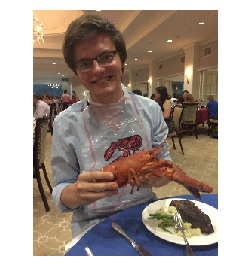

In [61]:
newImage = skipRes(janFolder + 'jan.png', 10)
saveArray(newImage, janFolder + 'jan_lowres_50.png')
showArray(newImage)

## Next, we will randomly select n rows and m columns 

In [97]:
def randomRes(filename, n, m):
    """
    filename: name of image to load in - must be .png
    n: number of rows to randomly select
    m: number of columns to randomly select
    """
    img = Image.open(filename)
    origArray = np.array(img)
    y, x, rgba = origArray.shape
    
    if n > y or m > x:
        print("Rows or columns are too big!")
        return None
    
    # Find shape of new array
    newArray = np.zeros([n, m, rgba], dtype=np.uint8)
    
    # Determine which rows and cols to use
    rows = np.arange(y)
    np.random.shuffle(rows)
    rows = sorted(rows[:n])
    
    cols = np.arange(x)
    np.random.shuffle(cols)
    cols = sorted(cols[:m])
    
    for i, row in enumerate(rows):
        for j, col in enumerate(cols):
            newArray[i,j] = origArray[row,col]

    return newArray

/Applications/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


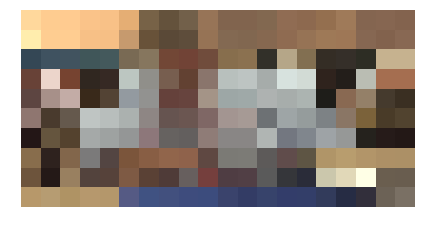

In [99]:
newImage = randomRes(janFolder + 'jan.png', 10, 20)
saveArray(newImage, janFolder + 'jan_random_10_20.png')
showArray(newImage)

/Applications/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


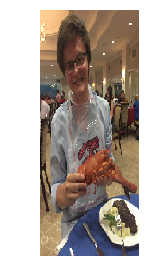

In [100]:
newImage = randomRes(janFolder + 'jan.png', 1000, 400)
saveArray(newImage, janFolder + 'jan_random_1000_400.png')
showArray(newImage)

# Averaging Rows and Column Values

In [110]:
def rowAvgs(filename):
    """
    filename: name of image to load in - must be .png
    """
    img = Image.open(filename)
    origArray = np.array(img)
    y, x, rgba = origArray.shape
    
    # Find shape of new array
    newArray = np.zeros([y, 1000, rgba], dtype=np.uint8)
    
    for row in np.arange(y):
        newArray[row,:] = np.mean(origArray[row,:], axis=0)

    return newArray

/Applications/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


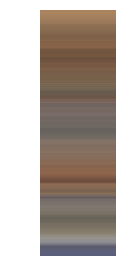

In [115]:
newImage = rowAvgs(janFolder + 'jan.png')
saveArray(newImage, janFolder + 'jan_rowAvg.png')
showArray(newImage)

In [112]:
def colAvgs(filename):
    """
    filename: name of image to load in - must be .png
    """
    img = Image.open(filename)
    origArray = np.array(img)
    y, x, rgba = origArray.shape
    
    # Find shape of new array
    newArray = np.zeros([1000, x, rgba], dtype=np.uint8)
    
    for col in np.arange(x):
        newArray[:,col] = np.mean(origArray[:,col], axis=0)

    return newArray

/Applications/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


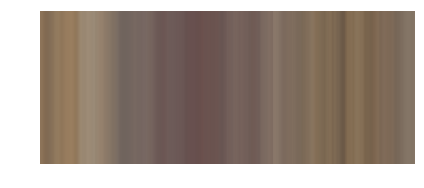

In [114]:
newImage = colAvgs(janFolder + 'jan.png')
saveArray(newImage, janFolder + 'jan_colAvg.png')
showArray(newImage)

# Pointillism Effect


In [139]:
def findRowColPairs(center, radius):
    x0, y0 = center
    oldVec = np.array([x0, y0])
    ret = []
    for x in range(x0 - radius, x0 + radius + 1):
        for y in range(y0 - radius, y0 + radius + 1):
            newVec = np.array([x, y])
            if np.linalg.norm(newVec - oldVec) <= radius:
                ret.append((x,y))
    return ret

In [151]:
def pointUp1(filename, n):
    """
    filename: name of image to load in - must be .png
    n: size of grid to find average color in - should be odd value
    """
    img = Image.open(filename)
    origArray = np.array(img)
    y, x, rgba = origArray.shape
    
    # Find shape of new array
    newArray = np.zeros([y, x, rgba], dtype=np.uint8)
    
    # Find average colors for each nxn grid
    row = 0
    while row < y - n:
        col = 0
        while col < x - n:
            gridVals = []
            for j in range(row, row + n):
                for i in range(col, col + n):
                    gridVals.append(origArray[j,i])
            meanColor = np.mean(gridVals, axis=0)
            center = (row + n // 2 + 1, col + n // 2 + 1)
            rowCols = findRowColPairs(center, n // 2)
            for r, c in rowCols:
                newArray[r, c] = meanColor
            col += n
        row += n
        print(row)

    return newArray

51
102
153
204
255
306
357
408
459
510
561
612
663
714
765
816
867
918
969
1020
1071
1122
1173
1224
1275
1326
1377
1428
1479
1530
1581
1632
1683
1734
1785
1836
1887
1938
1989
2040
2091
2142
2193
2244
2295
2346
2397
2448
2499
2550
2601
2652
2703
2754
2805
2856
2907
2958
3009
3060
3111
3162
3213


/Applications/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


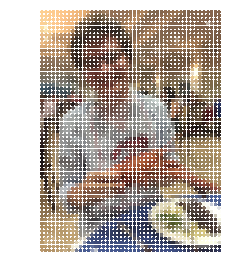

In [146]:
newImage = pointUp1(janFolder + 'jan.png', 51)
saveArray(newImage, janFolder + 'jan_pointUp1.png')
showArray(newImage)

21
42
63
84
105
126
147
168
189
210
231
252
273
294
315
336
357
378
399
420
441
462
483
504
525
546
567
588
609
630
651
672
693
714
735
756
777
798
819
840
861
882
903
924
945
966
987
1008
1029
1050
1071
1092
1113
1134
1155
1176
1197
1218
1239


/Applications/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


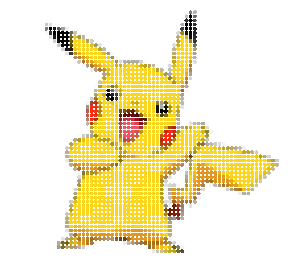

In [149]:
newImage = pointUp1(pikachuFolder + 'pikachu.png', 21)
saveArray(newImage, pikachuFolder + 'pikachu_pointUp1.png')
showArray(newImage)

## Let's add some noise to the circle sizes

In [174]:
def pointUp2(filename, n):
    """
    filename: name of image to load in - must be .png
    n: size of grid to find average color in - should be odd value
    """
    img = Image.open(filename)
    origArray = np.array(img)
    y, x, rgba = origArray.shape
    
    # Find shape of new array
    newArray = np.zeros([y, x, rgba], dtype=np.uint8)
    
    # Find average colors for each nxn grid
    row = 0
    while row < y - n:
        col = 0
        while col < x - n:
            gridVals = []
            for j in range(row, row + n):
                for i in range(col, col + n):
                    gridVals.append(origArray[j,i])
            meanColor = np.mean(gridVals, axis=0)
            center = (row + n // 2 + 1, col + n // 2 + 1)
            radius = max(0, int(np.random.normal(n // 2, n / 10)))
            rowCols = findRowColPairs(center, radius)
            for r, c in rowCols:
                # Add random noise of white
                if np.random.random() < .8:
                    newArray[r, c] = meanColor
                else:
                    newArray[r,c] = np.array([255,255,255,.5])
            col += n
        row += n
        print(row)

    return newArray

21
42
63
84
105
126
147
168
189
210
231
252
273
294
315
336
357
378
399
420
441
462
483
504
525
546
567
588
609
630
651
672
693
714
735
756
777
798
819
840
861
882
903
924
945
966
987
1008
1029
1050
1071
1092
1113
1134
1155
1176
1197
1218
1239


/Applications/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


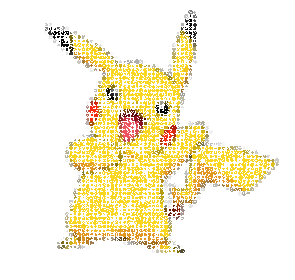

In [175]:
newImage = pointUp2(pikachuFolder + 'pikachu.png', 21)
saveArray(newImage, pikachuFolder + 'pikachu_pointUp2.png')
showArray(newImage)

9
18
27
36
45
54
63
72
81
90
99
108
117
126
135
144
153
162
171
180
189
198
207
216
225
234
243
252
261
270
279
288
297
306
315
324
333
342
351
360
369
378
387
396
405
414
423
432
441
450
459
468
477
486
495
504
513
522
531
540
549
558
567
576
585
594
603
612
621
630
639
648
657
666
675
684
693
702
711
720
729
738
747
756
765
774
783
792
801
810
819
828
837
846
855
864
873
882
891
900
909
918
927
936
945
954
963
972
981
990
999
1008
1017
1026
1035
1044
1053
1062
1071
1080
1089
1098
1107
1116
1125
1134
1143
1152
1161
1170
1179
1188
1197
1206
1215
1224
1233
1242
1251


/Applications/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


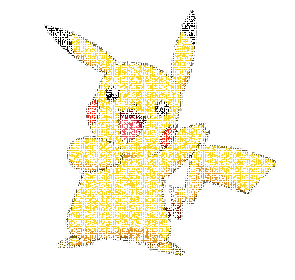

In [176]:
newImage = pointUp2(pikachuFolder + 'pikachu.png', 9)
saveArray(newImage, pikachuFolder + 'pikachu_pointUp2_2.png')
showArray(newImage)

51
102
153
204
255
306
357
408
459
510
561
612
663
714
765
816
867
918
969
1020
1071
1122
1173
1224
1275
1326
1377
1428
1479
1530
1581
1632
1683
1734
1785
1836
1887
1938
1989
2040
2091
2142
2193
2244
2295
2346
2397
2448
2499
2550
2601
2652
2703
2754
2805
2856
2907
2958
3009
3060
3111
3162
3213


/Applications/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


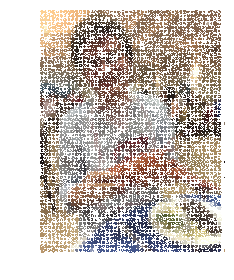

In [177]:
newImage = pointUp2(janFolder + 'jan.png', 51)
saveArray(newImage, janFolder + 'jan_pointUp2.png')
showArray(newImage)